### Capstone Project Module 3 | Machine Learning | Yunella A. Siagian (JCDSOL-013)

****

### **Bank Marketing Campaign**

[Sumber data 'Bank Marketing Campaign'](https://drive.google.com/file/d/1PQTTWgITANg5Av-1Ot28KCIHVyFaCmUK/view?usp=sharing)


##### **Contents**
  
- Business Problem Understanding
- Data Understanding
- Data Preprocessing
- Model Benchmarking
- Evaluation
- Conclusion
- Estimation of Business Profit
- Model Recommendation
- Business Recommendation
  
****

## Business Problem Understanding

##### **Context Business**

Jenis produk keuangan yang digunakan masyarakat semakin bervariasi. Salah satu produk keuangan yang banyak dikenal masyarakat adalah [Deposito Berjangka](https://www.investopedia.com/terms/t/termdeposit.asp). Mekanisme Deposito Berjangka adalah nasabah menyetorkan sejumlah uangnya ke bank atau lembaga keuangan, dan uang tersebut baru boleh ditarik setelah jangka waktu tertentu. Sebagai imbalannya, nasabah akan diberikan bunga tetap sesuai dengan jumlah nominal uang yang disetorkan.

Meski demikian, sebagai badan usaha yang memiliki produk keuangan dan nasabah masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan pelanggan baru adalah dengan melakukan kampanye pemasaran.

Target :

0 : Tidak membuka Deposito Berjangka

1 : Membuka Deposito Berjangka 

##### **Problem Statement**

Proses marketing/pemasaran pastinya mengeluarkan biaya yang banyak untuk menghubungi calon nasabah satu per satu dalam rangka memberikan informasi terkait adanya produk Deposito Berjangka. Apalagi jika harus semua nasabah yang dihubungi, pastinya ini akan memakan banyak biaya, waktu, dan energi, berhubung media pemasaran yang digunakan adalah media telepon satu per satu.

 Agar biaya yang dikeluarkan perusahakaan lebih optimal dan bertujuan dapat semuanya terkonversi menjadi nasabah baru, perusahaan meminta bantuan Data Scientist untuk memprediksi calon nasabah baru yang memang benar-benar tertarik untuk membuka Deposito Berjangka dan yang tidak tertarik. 

Dengan adanya hasil prediksi dari Data Scientist, harapannya perusahaan dapat menekan biaya marketing untuk nasabah yang memang diprediksi sebagai potential nasabah.

##### **Goals**

Dari permasalahan tersebut, perusahaan dapat mengetahui yang mana saja merupakan calon nasabah yang diprediksi akan membuka Deposito Berjangka sehingga perusahaan dapat fokus memasarkan informasi terbaru, _campaign_ atau semua hal terkait marketing Deposito Berjangka hanya ke nasabah yang diprediksi tertarik saja.

Selain itu, perusahaan juga dapat memiliki informasi kriteria-kriteria nasabah yang potential tersebut.

## Data Understanding

**Import Libraries**

In [133]:
# Pengolahan data
import pandas as pd
import numpy as np

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Model resampling/balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

# Evaluasi
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
import category_encoders as ce

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

# Save Final Model
import streamlit
import pickle

# Ignore warning
import warnings
warnings.filterwarnings("ignore")


**Load Dataset**

In [81]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no


- Dataset merupakan data Bank Campaign Marketing. 
- Setiap baris data merepresentasikan informasi terkait informasi nasabah.


In [82]:
# Mengubah target (kolom deposit)

df['deposit']= np.where(df['deposit']=='yes', 1, 0)
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
8,35,management,805,no,no,cellular,sep,1,-1,unknown,0
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,0


#### **Features Information**

| **Features** | **Data Type** | **Description** |
| --- | --- | --- |
| 1. age | Integer | Usia nasabah |
| 2. job| Object | Pekerjaan nasabah |
| 3. balance | Integer | Jumlah saldo yang dimiliki nasabah |
| 4. housing | Object | Apakah nasabah memiliki rumah (ya/tidak) |
| 5. loan | Object | Apakah nasabah memiliki pinjaman/hutang (ya/tidak) |
| 6. contact | Object | Alat komunikasi yang digunakan ke customer |
| 7. month| Object | Bulan kontak terakhir ke nasabah dalam tahun ini |
| 8. campaign | Integer | Jumlah kontak yang dilakukan selama kampanye kepada nasabah tersebut |
| 9. pdays | Integer | Jumlah hari setelah klien dihubungi dari kampanye sebelumnya; bernilai negative berarti nasabah tidak pernah dihubungi di kampanye pemasaran sebelumnya, dan bernilai positif artinya nasabah pernah dihubungi dan nilai angka nya menunjukkan berapa hari yang lalu kontak tersebut terjadi  |
| 10. poutcome | Object | Hasil dari kampanye pemasaran sebelumnya |
| 11. deposit | Object | Apakah nasabah tidak tertarik (0 ) atau tertarik (1) untuk membuka Deposito Berjangka |

In [6]:
# Banyak data (baris, kolom)
df.shape

(7813, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 641.0+ KB


#### **Missing Values**

<Axes: >

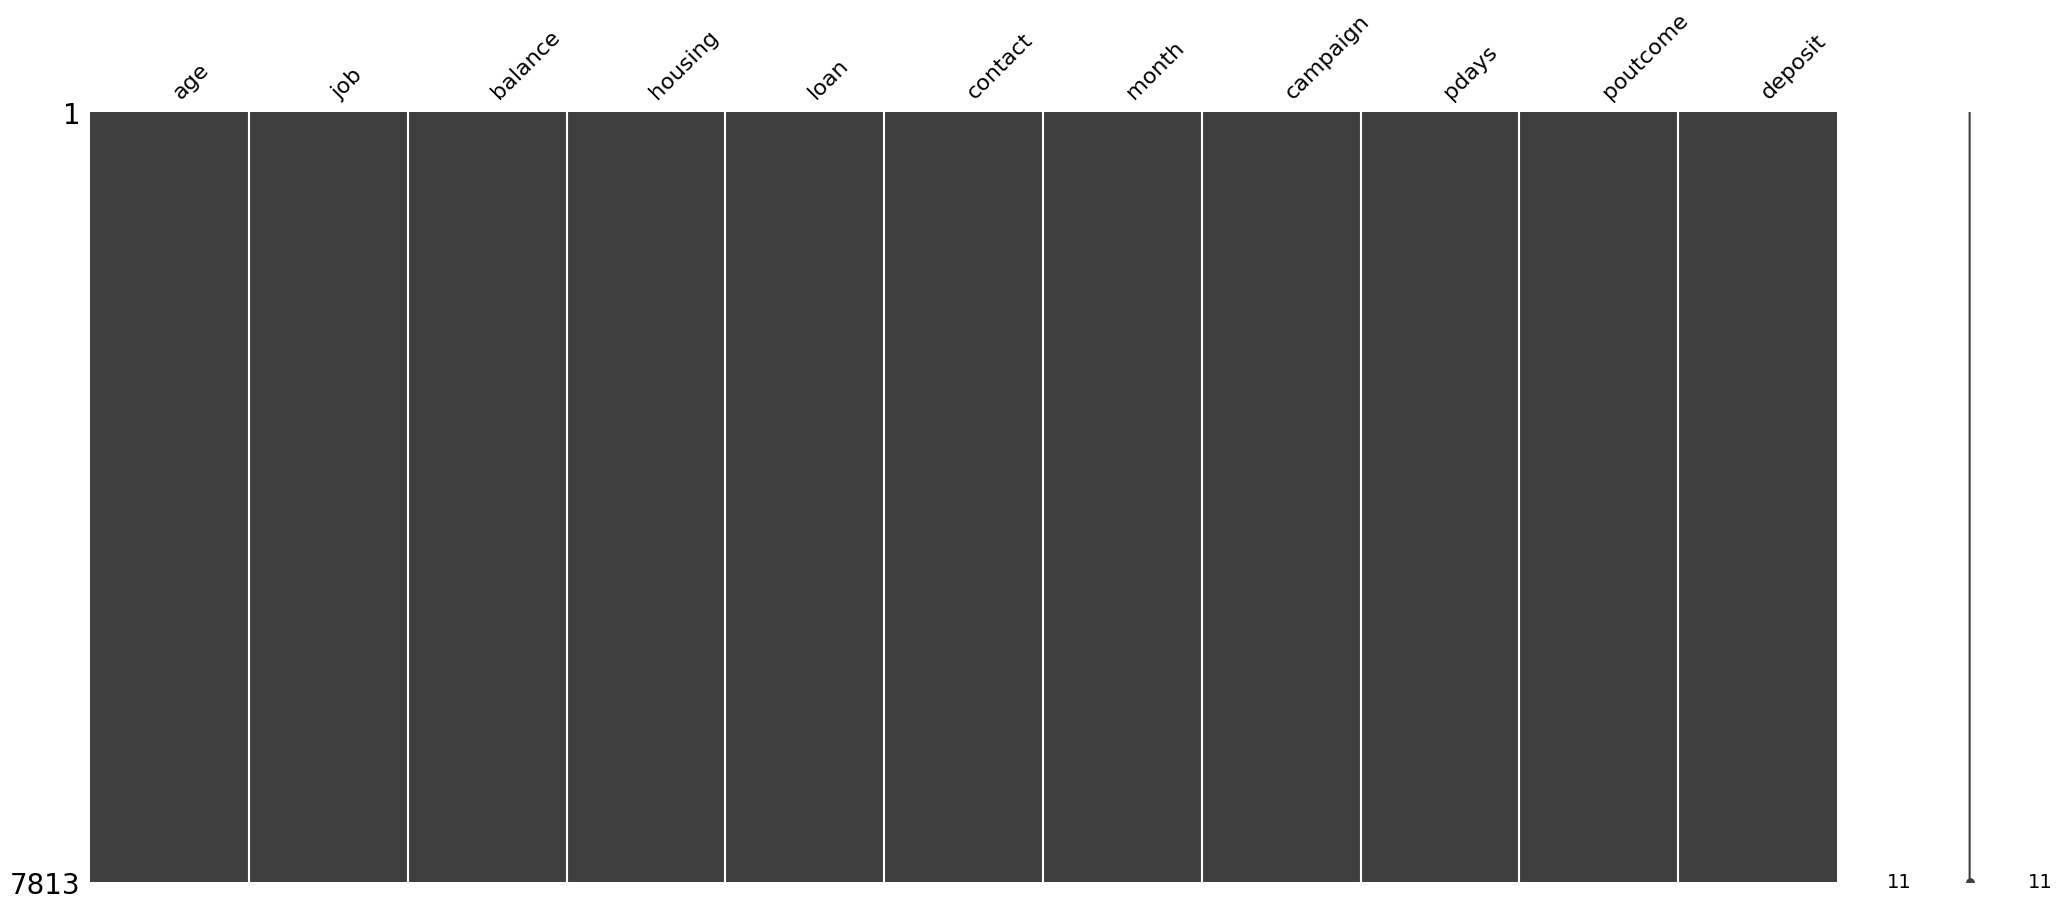

In [134]:
missingno.matrix(df)

In [135]:
# Jumlah missing values setiap kolom

missing = df.isna().sum().sort_values(ascending = False)

pd.DataFrame({'jumlah_data_kosong':missing})

,jumlah_data_kosong
age,0
job,0
balance,0
housing,0
loan,0
contact,0
month,0
campaign,0
pdays,0
poutcome,0


In [ ]:
missingno.matrix(df)

Data kita tidak memiliki data kosong di semua kolomnya.

#### **Data Numerik**

In [7]:
df.describe()

,age,balance,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550,0.477665
std,11.919710,3089.291831,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


In [131]:
print(f'Rata-rata usia nasabah yang tertarik membuka Deposito Berjangka adalah : {round(df[df['deposit']==1]['age'].mean())} tahun.')

print(f'Rata-rata saldo nasabah yang tertarik membuka Deposito Berjangka adalah : {round(df[df['deposit']==1]['balance'].mean())} USD.')

print(f'Rata-rata nasabah yang tertarik membuka Deposito Berjangka dihubungi sebanyak : {round(df[df['deposit']==1]['campaign'].mean())} kali selama marketing berlangsung.')

print(f'Rata-rata nasabah yang tertarik membuka Deposito Berjangka dihubungi : {round(df[df['deposit']==1]['pdays'].mean())} hari yang lalu.')

Rata-rata usia nasabah yang tertarik membuka Deposito Berjangka adalah : 42 tahun.
Rata-rata saldo nasabah yang tertarik membuka Deposito Berjangka adalah : 1812 USD.
Rata-rata nasabah yang tertarik membuka Deposito Berjangka dihubungi sebanyak : 2 kali selama marketing berlangsung.
Rata-rata nasabah yang tertarik membuka Deposito Berjangka dihubungi : 69 hari yang lalu.


##### **Distribusi Data**

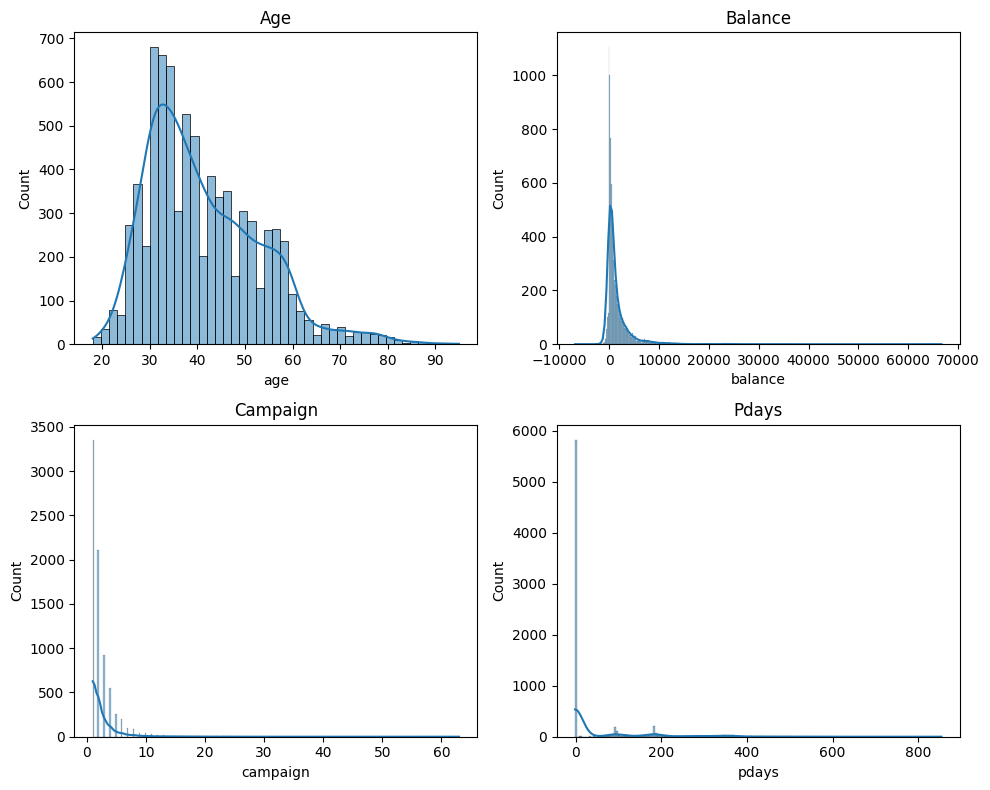

In [8]:
# Visualisasi data numerik 

plt.figure(figsize=(10, 8))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns.drop(['deposit'])

for feature in num_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.histplot(data=df, x=feature, kde = True)
    plt.title(feature.capitalize(), fontsize=12)
    plotnumber += 1
    plt.tight_layout()

Dari visualisasi data dengan grafik histogram, kita melihat bahwa secara keseluruhan distribusi data Bank Campaign ini tidak terdistribusi normal atau skewed ke kanan.

**Boxplot**

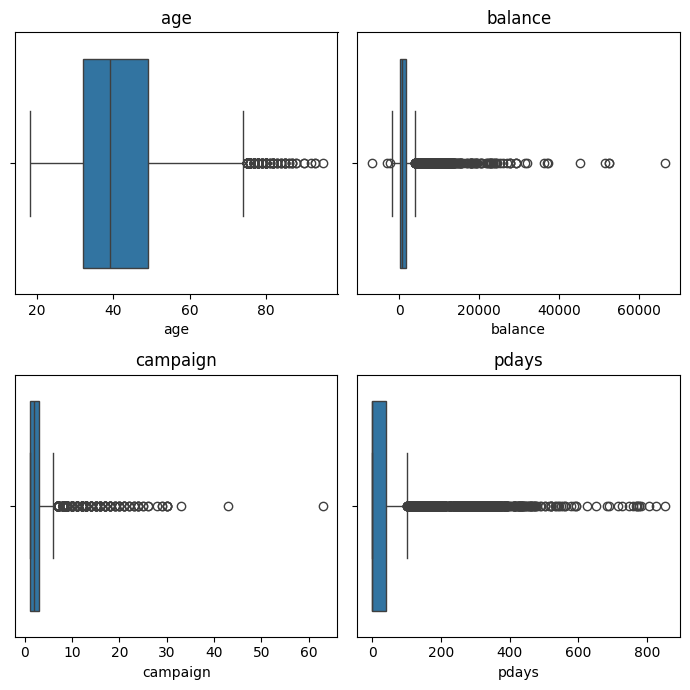

In [9]:
plt.figure(figsize=(7, 7))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns.drop(['deposit'])

for feature in num_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.boxplot(data=df, x=feature)
    plt.title(feature, fontsize=12)
    plotnumber += 1
    plt.tight_layout()

Dari visualisasi data dengan boxplot, kita melihat bahwa data Bank Marketing Campaign ini memiliki anomali atau outliers yang banyak. Selanjutnya kita akan memeriksa data anomali tersebut dengan melihat Inter Quartile Range (IQR)-nya.

##### **Inter Quartile Range (IQR)**

In [10]:
numerik = df.select_dtypes(include = 'number')
numerik1 = numerik.drop(columns = 'deposit')
numerik1.head()

,age,balance,campaign,pdays
0,55,1662,2,-1
1,39,-3058,3,-1
2,51,3025,1,352
3,38,-87,1,-1
4,36,205,4,-1


In [11]:
for kolom in numerik1.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float((q3 + whis).iloc[0])
  lower_bound = float((q1 - whis).iloc[0])

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f'`{kolom}` memiliki outliers sebanyak : {jumlah_outliers}')

`age` memiliki outliers sebanyak : 121
`balance` memiliki outliers sebanyak : 736
`campaign` memiliki outliers sebanyak : 429
`pdays` memiliki outliers sebanyak : 1454


Dari 7813 total data, terlihat bahwa data anomali tertinggi terdapat pada kolom pdays (sekitar 18,6% ) yaitu jumlah berapa hari nasabah dihubungi terakhir dari kampanye pemasaran sebelumnya. Dimana anomali disini masih normal karena keberhasilan nasabah untuk bisa dihubungi tidak bisa kita kendalikan.

##### **Correlation**

In [12]:
# Karena data kita memiliki outliers kita menggunakan metode 'spearman' untuk melihat korelasi

numerik.corr(method = 'spearman')

,age,balance,campaign,pdays,deposit
age,1.000000,0.100600,0.023335,0.009668,0.000583
balance,0.100600,1.000000,-0.036909,0.090169,0.168333
campaign,0.023335,-0.036909,1.000000,-0.124030,-0.124820
pdays,0.009668,0.090169,-0.124030,1.000000,0.219493
deposit,0.000583,0.168333,-0.124820,0.219493,1.000000


<Axes: >

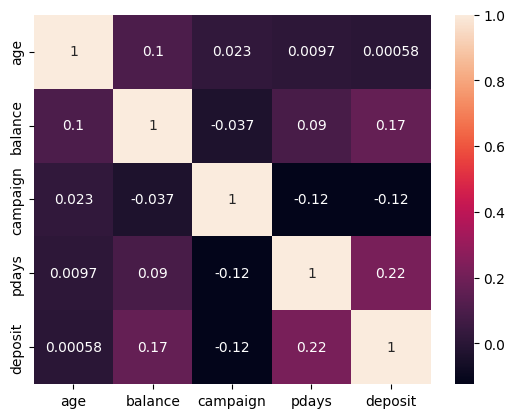

In [13]:
# Melihat korelasi

sns.heatmap(df.select_dtypes(include='number').corr(method = 'spearman'), annot=True)

Terlihat bahwa tidak ada kolom yang memiliki korelasi tinggi terhadap `deposit`.

##### **Multikolinearitas**

In [14]:
# Fungsi untuk mengecek multikolinearitas

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [15]:
# Melihat nilai VIF untuk data numerik

calc_vif(df.select_dtypes(include='number'))

,variables,VIF
0,age,2.985729
1,balance,1.261596
2,campaign,1.756037
3,pdays,1.252216
4,deposit,1.914365


Nilai VIF yang kurang dari 4 mengindikasikan tidak adanya masalah multikolinieritas yang serius dalam data yang kita miliki.

#### **Data Kategorik**

In [37]:
kategorik = df.select_dtypes(include = 'object')
kategorik.head()

,job,housing,loan,contact,month,poutcome
0,admin.,no,no,cellular,jun,unknown
1,self-employed,yes,yes,cellular,apr,unknown
2,admin.,no,no,cellular,may,other
3,services,yes,no,cellular,may,unknown
4,housemaid,yes,no,telephone,nov,unknown


##### **Kardinalitas**

Text(0.5, 1.0, 'Unique Values')

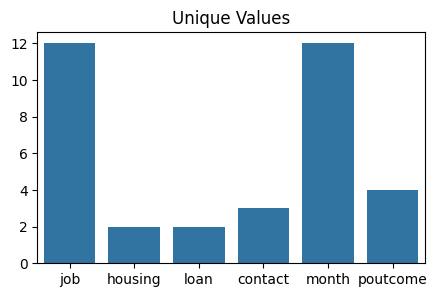

In [38]:
# Visualisasi dengan Seaborn

plt.figure(figsize = (5,3))
sns.barplot(x = kategorik.nunique().index, y = kategorik.nunique().values)
plt.xlabel('')
plt.title('Unique Values')

In [18]:
kategorik.describe(include = 'object')

,job,housing,loan,contact,month,poutcome
count,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1792,4140,6789,5628,1976,5819


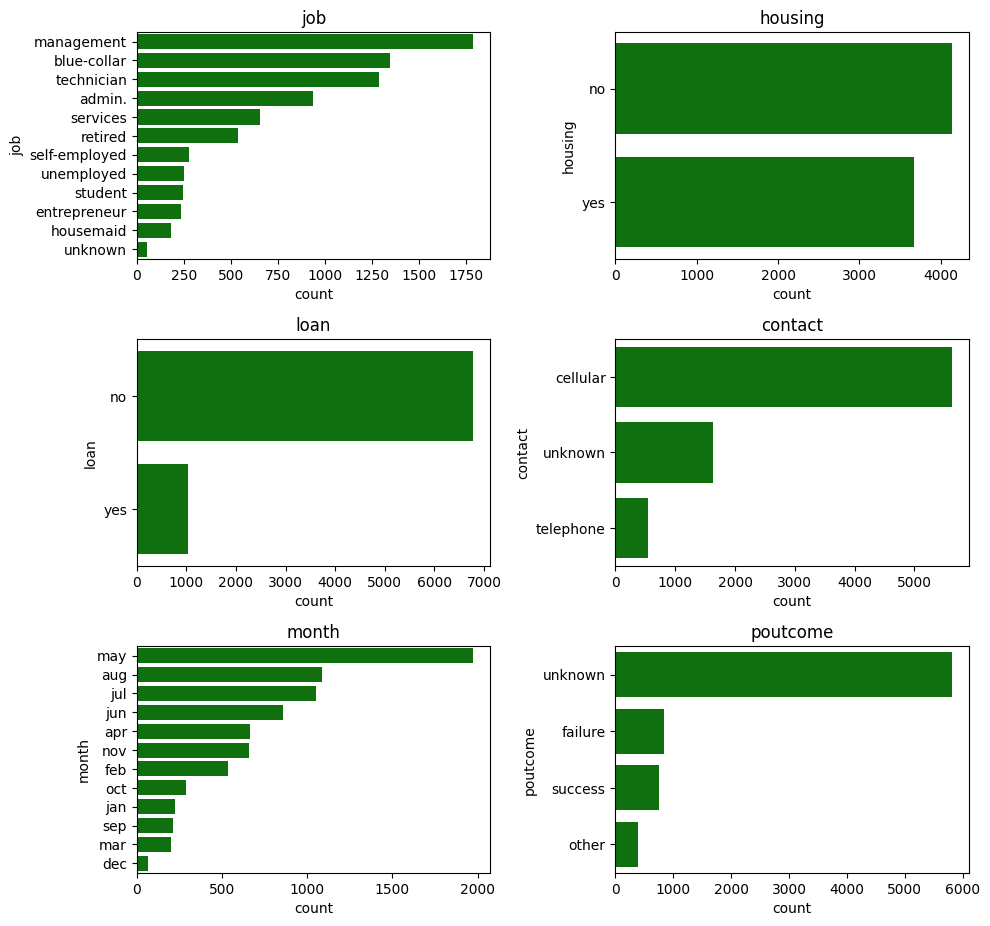

In [19]:
count = 0
fig = plt.figure(figsize=(10,12))
for kolom in df.select_dtypes(exclude='number').columns:
    count += 1
    plt.subplot(4,2,count)
    sns.countplot(y = kolom, 
                  data = df.select_dtypes(exclude='number'), 
                  order = df.select_dtypes(exclude='number')[kolom].value_counts().sort_values(ascending = False).index, 
                  color= 'green')
    plt.title(kolom, fontsize=12)
    fig.tight_layout()

plt.show()

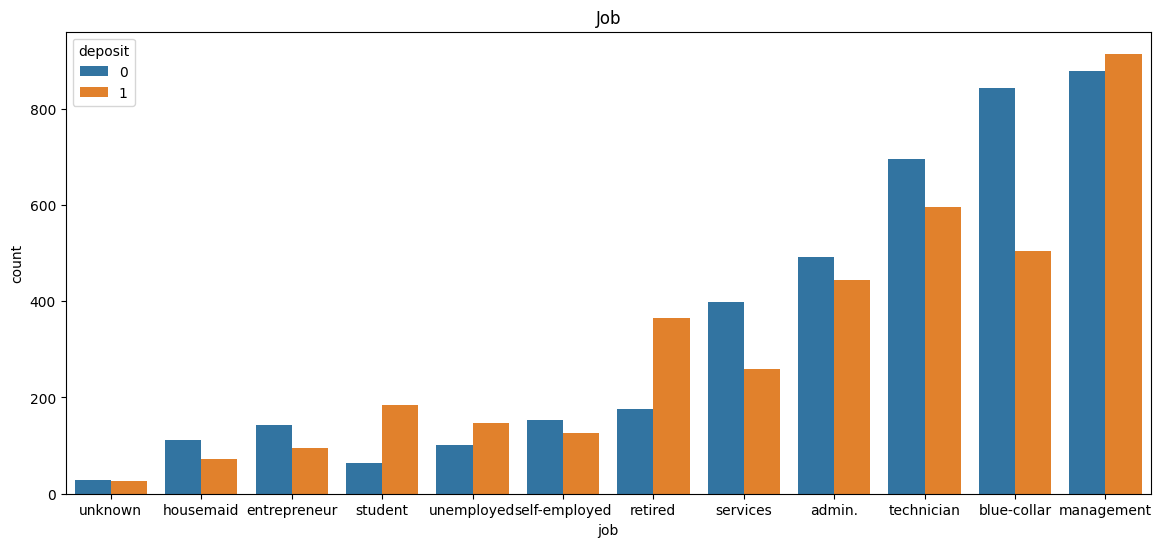

In [141]:
plt.figure(figsize=(14,6))
sns.countplot(x = df['job'], data = df, order = df['job'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Job',fontsize=12)

plt.show()

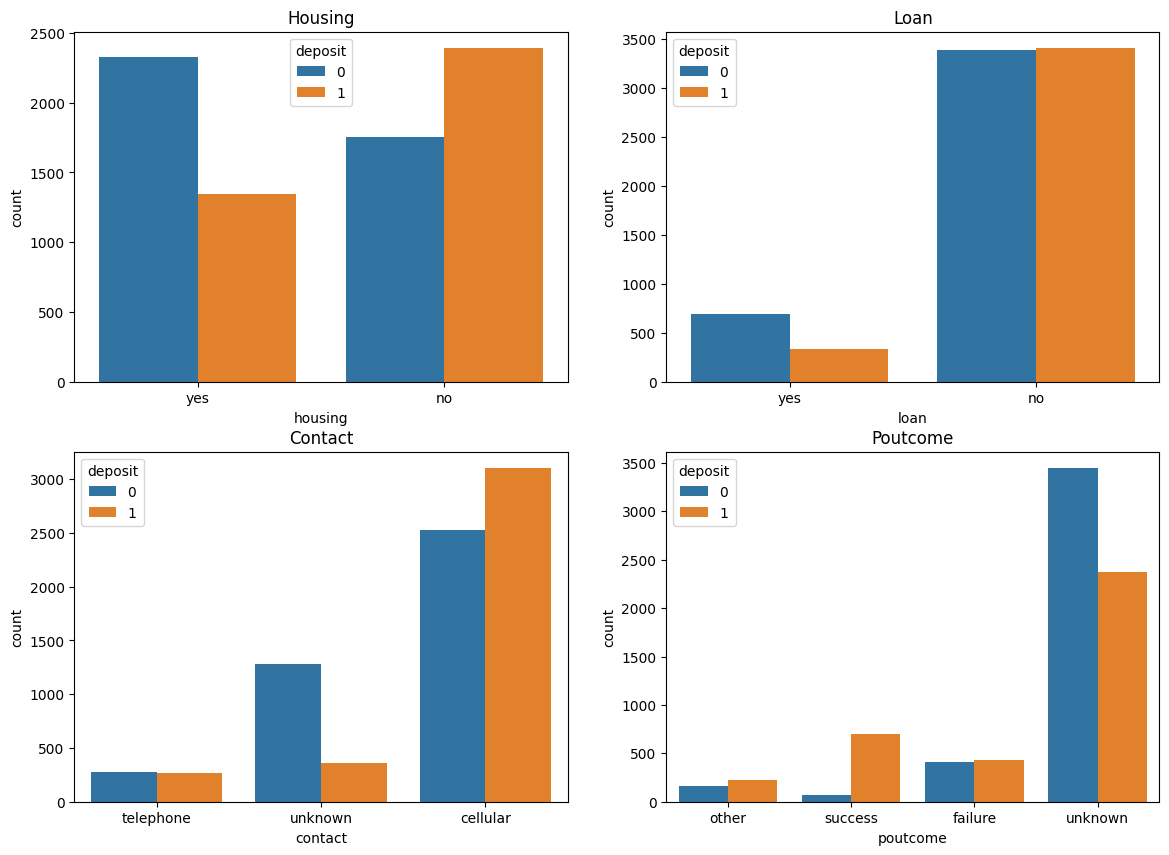

In [83]:
# Visualisasi count  berdasarkan beberapa fitur kategorik

plt.figure(figsize=(14,10))

plt.subplot(221)
sns.countplot(x = df['housing'], data = df, order = df['housing'].value_counts().sort_values(ascending =    True).index, hue= 'deposit')
plt.title('Housing',fontsize=12)

plt.subplot(222)
sns.countplot(x = df['loan'], data = df, order = df['loan'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Loan',fontsize=12)

plt.subplot(223)
sns.countplot(x = df['contact'], data = df, order = df['contact'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Contact',fontsize=12)

plt.subplot(224)
sns.countplot(x = df['poutcome'], data = df, order = df['poutcome'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Poutcome',fontsize=12)

plt.show()

Dari dataset yang dimiliki kriteria nasabah yang tertarik membuka Deposito Berjangka adalah nasabah yang bekerja di bagian management, nasabah yang tidak memiliki rumah, tidak memiliki pinjaman, dihubungi melalui cellular, dan yang hasil marketing sebelumnya tidak diketahui.

##### **Check Imbalance**

In [21]:
df['deposit'].value_counts()/len(df)*100

deposit
0    52.233457
1    47.766543
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='deposit'>

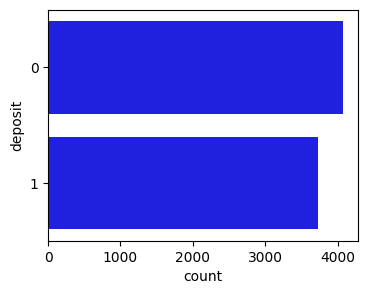

In [22]:
# Visualisasi count deposit

plt.figure(figsize=(4,3))

sns.countplot(y = df['deposit'], 
                  data = df, 
                  order = df['deposit'].value_counts().sort_values(ascending = False).index, 
                  color= 'blue')

Data cukup seimbang (balanced) antara calon nasabah yang akan membuka dan tidak membuka Deposit Berjangka. Selisihnya hanya sekitar 5%. Namun untuk memastikan distribusi data kita terus berimbang (_balanced_), kita tetap akan melalukan balancing ke depannya.

## Data Preprocessing

#### **Handling Missing Values**

In [9]:
# Membuat dataframe berisi data kosong dan data unique

list_item = []

for col in df.columns :
    list_item.append([col, 
                     df[col].dtype, 
                     df[col].isna().sum(), 
                    ((df[col].isna().sum()/len(df))*100),
                    df[col].nunique(),
                    df[col].unique()
                    ])

df_desc = pd.DataFrame(columns=['data_features', 'data_type', 'null', '%_null', 'unique', 'unique_sample'],
                       data=list_item)
df_desc

,data_features,data_type,null,%_null,unique,unique_sample
0,age,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,object,0,0.0,2,"[no, yes]"
4,loan,object,0,0.0,2,"[no, yes]"
5,contact,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,object,0,0.0,4,"[unknown, other, failure, success]"


In [10]:
# Memastikan kembali data kosong

df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Data yang dimiliki tidak memiliki data kosong. Apabila ada data kosong, kita perlu mempertimbangkan apakah akan mengisi dengan median atau mean pada data numerik, atau mengisi suatu kata secara konstan pada data kategorik. Karena data sudah bersih dari data kosong, kita dapat langsung melanjukan ke tahapan berikutnya.

#### **Handling Outliers**

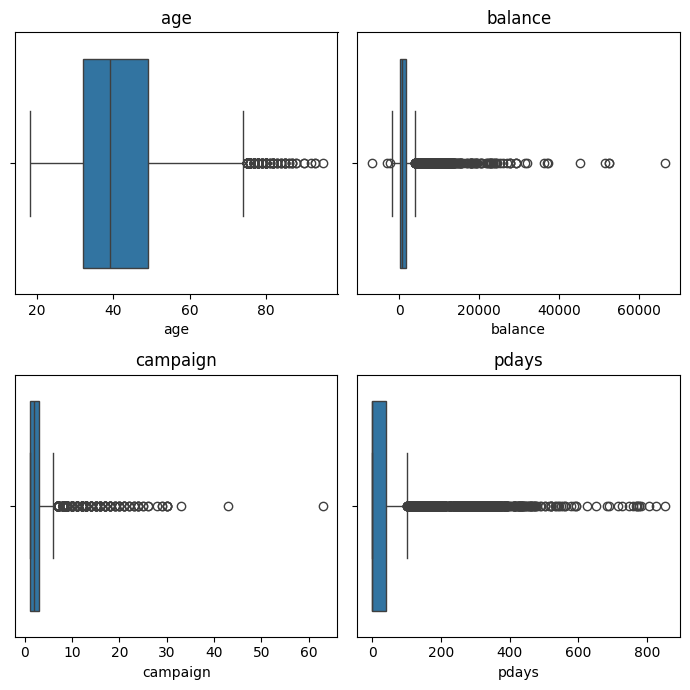

In [11]:
plt.figure(figsize=(7, 7))
plotnumber = 1
num_features = df.select_dtypes(include='number').columns.drop(['deposit'])

for feature in num_features:
    ax = plt.subplot(2, 2, plotnumber)
    sns.boxplot(data=df, x=feature)
    plt.title(feature, fontsize=12)
    plotnumber += 1
    plt.tight_layout()

In [26]:
# Melihat kembali banyak outliers

for kolom in numerik1.columns:
  q1 = numerik[[kolom]].quantile(0.25)
  q3 = numerik[[kolom]].quantile(0.75)
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float((q3 + whis).iloc[0])
  lower_bound = float((q1 - whis).iloc[0])

  jumlah_outliers = len(numerik[(numerik[kolom] < lower_bound) | (numerik[kolom] > upper_bound)])
  print(f'`{kolom}` memiliki outliers sebanyak : {jumlah_outliers}')

`age` memiliki outliers sebanyak : 121
`balance` memiliki outliers sebanyak : 736
`campaign` memiliki outliers sebanyak : 429
`pdays` memiliki outliers sebanyak : 1454


In [12]:
# Copy data 
dfc = df.copy()

In [13]:
dfc.shape

(7813, 11)

**Age**

In [14]:
Q1_age = dfc['age'].quantile(0.25)
Q3_age = dfc['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
whis_age = 1.5 * IQR_age

upper_bound_age = Q3_age + whis_age
upper_bound_age

74.5

Batas atas dari `age` adalah usia 74.5 tahun.

In [15]:
# Nasabah berusia > 80 tahun

dfc[(dfc['age'] >= 80)].head(4)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
155,82,retired,211,no,no,telephone,apr,3,-1,unknown,0
546,93,retired,775,no,no,cellular,aug,2,13,success,1
853,80,retired,173,no,no,cellular,aug,3,-1,unknown,0
983,87,retired,6746,no,no,telephone,oct,1,-1,unknown,1


Dari fitur `age`, kita putuskan untuk menghapus data nasabah yang usianya jauh diatas upper_bound.

Nasabah yang sudah berusaha di atas 80 tahun akan kita drop/hapus karena produk Deposito Berjangka ini membutuhkan komitmen dari nasabah untuk menyimpang sejumlah uang dalam periode waktu tertentu (misal 6 bulan - 3 tahun). Nasabah lansia berusia di atas 80 tahun pasti lebih membutuhkan tabungan mereka pada hari tua, sehingga kita asumsikan bahwa mereka bukan potential nasabah untuk kampanye marketing yang sedang kita lakukan.

In [16]:
dfc = dfc.drop(dfc[(dfc['age']>= 80)].index)
dfc.head(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


In [17]:
dfc.shape

(7765, 11)

**Balance**

In [18]:
Q1_balance = dfc['balance'].quantile(0.25)
Q3_balance = dfc['balance'].quantile(0.75)
IQR_balance = Q3_balance - Q1_balance
whis_balance = 1.5 * IQR_balance

lower_bound_balance = Q1_balance - whis_balance
lower_bound_balance

-2207.0

In [19]:
# Nasabah dengan saldo minus

dfc[(dfc['balance'] < 0)]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,0
59,50,admin.,-194,yes,no,cellular,apr,2,-1,unknown,0
65,31,services,-327,yes,no,unknown,may,1,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7712,40,management,-63,no,yes,cellular,jul,1,-1,unknown,0
7757,33,technician,-479,no,no,cellular,aug,1,-1,unknown,0
7758,57,retired,-157,no,no,cellular,aug,9,-1,unknown,0
7763,28,management,-994,yes,yes,cellular,jul,2,-1,unknown,0


Dari fitur `balance`, kita putuskan untuk menghapus data nasabah yang saldonya minus karena nasabah ini berarti _[overdraft](https://www.sofi.com/learn/content/negative-bank-balance/)_.

Nasabah yang memiliki saldo minus, kita asumsikan merupakan individu yang belum memiliki kecerdasan finansial yang baik dalam mengelola keuangan digambarkan mereka memiliki saldo rekening yang bernilai minus. Mereka melakukan penarikan uang melebihi saldo yang dimiliki. Nasabah dengan saldo minus ini kurang tepat dijadikan potential nasabah untuk kita lakukan marketing mengenai produk Deposito Berjangka.

In [20]:
dfc = dfc.drop(dfc[(dfc['balance'] < 0)].index)

In [21]:
dfc.shape

(7286, 11)

**Campaign**

In [22]:
Q1_campaign = dfc['campaign'].quantile(0.25)
Q3_campaign = dfc['campaign'].quantile(0.75)
IQR_campaign = Q3_campaign - Q1_campaign
whis_campaign = 1.5 * IQR_campaign

In [23]:
upper_bound_campaign = Q3_campaign + whis_campaign
upper_bound_campaign

6.0

In [24]:
dfc[(dfc['campaign'] > 20)]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
67,51,services,7,yes,no,cellular,jul,30,-1,unknown,0
304,38,blue-collar,1686,yes,no,unknown,jun,28,-1,unknown,0
548,45,management,9051,yes,no,unknown,may,63,-1,unknown,0
1349,52,management,1453,no,no,telephone,jul,21,-1,unknown,0
1472,31,blue-collar,892,yes,no,cellular,jul,22,-1,unknown,0
1599,49,services,933,no,yes,cellular,jul,33,-1,unknown,0
1619,42,admin.,214,yes,no,unknown,may,24,-1,unknown,0
2106,28,blue-collar,0,no,yes,cellular,jul,21,-1,unknown,0
2371,35,management,3168,no,no,cellular,aug,30,-1,unknown,0
2494,50,blue-collar,280,yes,no,unknown,jun,23,-1,unknown,0


In [25]:
# Memeriksa berapa nasabah yang dihubungi sebanyak lebih 20 kali dan tertarik deposit

dfc[(dfc['campaign'] > 20) & (dfc['deposit'] == 1)].shape[0]

2

In [26]:
# Memeriksa berapa nasabah yang dihubungi sebanyak lebih 20 kali dan tidak tertarik deposit

dfc[(dfc['campaign'] > 20) & (dfc['deposit'] == 0)].shape[0]

24

Dari kampanye marketing sebelumnya, nasabah yang terlalu sering dihubungi cenderung tidak membuka Deposito Berjangka. Dari data diatas terlihat bahwa nasabah yang dihubungi lebih dari 20 kali, hanya 2 orang yang membuka Deposito Berjangka dan 24 orang menolaknya.

Oleh sebab itu, kita akan hapus data yang jumlah `campaign` lebih dari 20 kali, yang berarti ada saatnya nasabah dihubungi 2x sebulan untuk marketing. Jumlah 20 kali ini juga sudah jauh di atas nilai batas atas untuk fitur `campaign`.

In [27]:
dfc = dfc.drop(dfc[(dfc['campaign'] > 20)].index)
dfc.shape

(7260, 11)

**Pdays**

In [28]:
Q1_pdays = dfc['pdays'].quantile(0.25)
Q3_pdays = dfc['pdays'].quantile(0.75)
IQR_pdays = Q3_pdays - Q1_pdays
whis_pdays = 1.5 * IQR_pdays

upper_bound_pdays = Q3_pdays + whis_pdays
upper_bound_pdays

196.5

In [29]:
dfc[(dfc['pdays'] > 720)]

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
399,31,blue-collar,0,yes,no,unknown,aug,1,782,other,1
604,33,unemployed,2066,no,yes,cellular,sep,1,749,failure,1
1175,34,blue-collar,320,yes,no,cellular,aug,1,828,failure,1
1324,27,blue-collar,821,yes,yes,unknown,sep,1,778,other,0
3165,35,management,1120,no,no,unknown,sep,1,771,success,0
3315,37,technician,432,yes,no,cellular,jul,3,776,failure,1
4683,60,services,4256,yes,no,cellular,aug,3,761,other,1
5768,36,management,335,no,no,unknown,oct,1,772,failure,0
6918,32,technician,1547,no,no,cellular,oct,1,805,other,1
7115,38,management,1477,no,no,cellular,sep,3,769,failure,1


In [30]:
# Memeriksa berapa nasabah yang terakhir dihubungi 2 tahun lalu dan tertarik deposit

dfc[(dfc['pdays'] > 720) & (dfc['deposit'] == 1)].shape[0]

9

In [31]:
# Memeriksa berapa nasabah yang terakhir dihubungi 2 tahun lalu namun tidak tertarik deposit

dfc[(dfc['pdays'] > 720) & (dfc['deposit'] == 0)].shape[0]

3

Karena dari data diatas terlihat bahwa nasabah yang terakhir dihubungi sekitar 2 tahun yang lalu ada 9 orang tertarik dan 3 orang tidak tertarik. Ini menunjukkan walaupun nasabah sudah lama dari terakhir dihubungi pihak marketing, nasabah tersebut potensial untuk membuka produk Deposito Berjangka. Oleh karena ini, kita putuskan tidak ada data yang dihapus dari outliers `pdays`.

In [32]:
dfc.shape

(7260, 11)

Dari total sebelumnya 7813 data, kita akan menggunakan 7260 data yang sudah kita bersihkan dari outliers untuk kita lakukan modelling.

#### **Data Splitting**

In [33]:
dfc

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,1
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


In [34]:
X = dfc.drop(columns = ['deposit'])
y = dfc['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    stratify = y,
    random_state = 2024)

#### **Encoding & Scaling**

In [39]:
kategorik.nunique()

job         12
housing      2
loan         2
contact      3
month       12
poutcome     4
dtype: int64

In [40]:
df['month'].unique()

array(['jun', 'apr', 'may', 'nov', 'jan', 'sep', 'feb', 'mar', 'aug',
       'jul', 'oct', 'dec'], dtype=object)

In [41]:
ordinal_mapping = [
    {'col':'month',
    'mapping':{
        'jan'       :    1,
        'feb'       :    2,
        'mar'       :    3,
        'apr'       :    4,
        'may'       :    5,
        'jun'       :    6,
        'jul'       :    7,
        'aug'       :    8,
        'sep'       :    9,
        'oct'      :    10,
        'nov'      :    11,
        'dec'     :     12
    }}
    ]

Tranformer untuk encoding dan scaling.

In [42]:
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(drop = 'first'), ['housing', 'loan', 'contact']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['month']),
    ('binary', ce.BinaryEncoder(), ['job', 'poutcome']),
    ('robust scaler', RobustScaler(), ['age', 'balance', 'campaign','pdays'])
], remainder = 'passthrough')

#### **Resampling Benchmarking**

**No Treatment**

In [69]:
X_train_prep = pd.DataFrame(transformer.fit_transform(X_train))
X_test_prep = pd.DataFrame(transformer.transform(X_test)) # X_test tidak di-FITTING
X_train_prep.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.588235,-0.237786,1.0,0.0
1,1.0,1.0,0.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.058824,-0.387446,-0.5,0.0
2,1.0,1.0,0.0,1.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,-0.470588,-0.206865,8.0,0.0
3,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.588235,0.779530,0.5,0.0
4,1.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.647059,2.412183,-0.5,0.0


In [55]:
# Untuk Imbalance atau Resampling Benchmarking kita menggunakan model logistic regression

logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_prep, y_train)

y_pred = logreg.predict(X_test_prep)
no_treatment = f1_score(y_test, y_pred)
no_treatment

0.6715116279069767

In [57]:
# Fungsi modelling

def modelling(x, y):
    logreg = LogisticRegression(max_iter=10000)
    logreg.fit(x, y)
    y_pred = logreg.predict(X_test_prep)
    return f1_score(y_test, y_pred)

In [58]:
# balancing benchmarking

rus = RandomUnderSampler(random_state=2024)
cnn = CondensedNearestNeighbour(sampling_strategy = 'auto')
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto')
nm1 = NearMiss(version = 1)
nm2 = NearMiss(version = 2)
nm3 = NearMiss(version = 3)
smote = SMOTE()

In [59]:
balancings = [rus, cnn, ncr, nm1, nm2, nm3, smote]

balance_score = [no_treatment]

for balancing in balancings:
    X, y = balancing.fit_resample(X_train_prep, y_train)
    balance_score.append(modelling(X, y))
    balance_score

In [60]:
pd.DataFrame({
    'balancing method':['No Treatment', 'RUS', 'CNN', 'NCR', 'NearMiss1', 'NearMiss2', 'NearMiss3', 'SMOTE'],
    'f1 score': balance_score
}).sort_values(by='f1 score', ascending=False)

,balancing method,f1 score
3,NCR,0.699187
2,CNN,0.689434
4,NearMiss1,0.677511
5,NearMiss2,0.673759
1,RUS,0.672328
6,NearMiss3,0.672011
0,No Treatment,0.671512
7,SMOTE,0.671408


Kita akan menggunakan **Neighbourhood Cleaning Rule (NCR)** untuk balancing data Bank Marketing Campaign. NCR adalah salah satu teknik undersampling yang melibatkan algoritma k-Nearest Neighbour (k-NN) untuk menghapus sampel-sampel yang terlalu dekat dengan kelas minoritas.


## Model Benchmarking

In [44]:
# beberapa model yang akan di benchmark / diuji

logreg = LogisticRegression(max_iter=10000, random_state=2024)
tree = DecisionTreeClassifier(criterion='entropy', random_state=2024)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=2024)
xgb = XGBClassifier(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
gbc = GradientBoostingClassifier(random_state=2024)

In [45]:
skfold = StratifiedKFold(n_splits=5)
models = [logreg, tree, knn, rf, xgb, ada, gbc]

score_list = []
std_list = []

for model in models:
    estimator = Pipeline([
        ('preparation', transformer),
        ('balancing', NeighbourhoodCleaningRule(sampling_strategy = 'auto')),
        ('modelling', model)
    ])

    score = cross_val_score(estimator, X_train, y_train, cv = skfold, scoring='f1')
    score_list.append(score.mean())
    print(model)
    print(score)

    std = cross_val_score(estimator, X_train, y_train, cv = skfold, scoring='f1').std()
    std_list.append(std)

pd.DataFrame({
    'model': models,
    'mean score': score_list,
    'std score': std_list
}).sort_values('mean score', ascending = False)

LogisticRegression(max_iter=10000, random_state=2024)
[0.68956229 0.68322148 0.69374168 0.69135802 0.69013112]
DecisionTreeClassifier(criterion='entropy', random_state=2024)
[0.66618392 0.66865672 0.67816092 0.6801444  0.64145234]
KNeighborsClassifier()
[0.68329868 0.67283073 0.68902865 0.68495077 0.64946237]
RandomForestClassifier(random_state=2024)
[0.69815195 0.68446943 0.69799585 0.69936931 0.67965368]
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, m

,model,mean score,std score
6,GradientBoostingClassifier(random_state=2024),0.697018,0.005658
4,"XGBClassifier(base_score=None, booster=None, c...",0.692392,0.008192
5,AdaBoostClassifier(random_state=2024),0.692168,0.005286
3,RandomForestClassifier(random_state=2024),0.691928,0.008212
0,"LogisticRegression(max_iter=10000, random_stat...",0.689603,0.003499
2,KNeighborsClassifier(),0.675914,0.014265
1,"DecisionTreeClassifier(criterion='entropy', ra...",0.666920,0.013809


Model terbaik adalah GradientBoostingClassifier (GBC).

## Evaluation

**Evaluation Metrics**

Recall digunakan untuk menekan False Negatif.
Presisi digunakan untuk menekan False Positif.

Kerugian perusahaan dari **False Negatif** (saat nasabah tertarik Deposito Berjangka namun kita prediksi tidak tertarik) adalah perusahaan akan kehilangan potential nasabah dan nasabah tersebut akhirnya membuka Deposito Berjangka di bank lain (competitor).
    
Kerugian perusahaan dari **False Positif** (saat nasabah tidak tertarik Deposito Berjangka namun kita prediksi tertarik) adalah perusahaan mengalami kerugian biaya marketing yang tidak tepat sasaran, menghabiskan banyak waktu untuk menghubungi calon nasabah namun tidak terkonversikan sebagai nasabah baru yang berhasil pembukaan Deposito Berjangka.

Oleh karena keduanya memiliki kerugian yang hampir sama terhadap perusahaan, kita akan memakai **f1 score** sebagai rataan harmonik dari recall dan presisi untuk memilih model algoritma.

**Evaluation Model**

In [150]:
from sklearn.metrics import f1_score

estimator = Pipeline([
    ('preparation', transformer),
    ('modelling', gbc)
])

estimator.fit(X_train, y_train)

y_train_pred = estimator.predict(X_train)

y_pred = estimator.predict(X_test)

print(f'F1 score dari data training : {f1_score(y_train, y_train_pred)}')

print(f'F1 score dari data testing : {f1_score(y_test, y_pred)}')

F1 score dari data training : 0.7163953048087845
F1 score dari data testing : 0.7027439024390244


Terlihat bahwa hasil yang diperoleh untuk Data Training dan Data Testing tidak jauh berbeda. Ini berarti model machine learning yang dibangun memiliki performace yang tidak terlalu berbeda pada data training dan testing-nya.

In [49]:
print('classification report Data Training ')
print(classification_report(y_train, y_train_pred))

print('Classification report Data Testing')
print(classification_report(y_test, y_pred))

classification report Data Training 
              precision    recall  f1-score   support

           0       0.72      0.82      0.76      2965
           1       0.78      0.67      0.72      2843

    accuracy                           0.74      5808
   macro avg       0.75      0.74      0.74      5808
weighted avg       0.75      0.74      0.74      5808

Classification report Data Testing
              precision    recall  f1-score   support

           0       0.71      0.81      0.76       741
           1       0.77      0.65      0.70       711

    accuracy                           0.73      1452
   macro avg       0.74      0.73      0.73      1452
weighted avg       0.74      0.73      0.73      1452



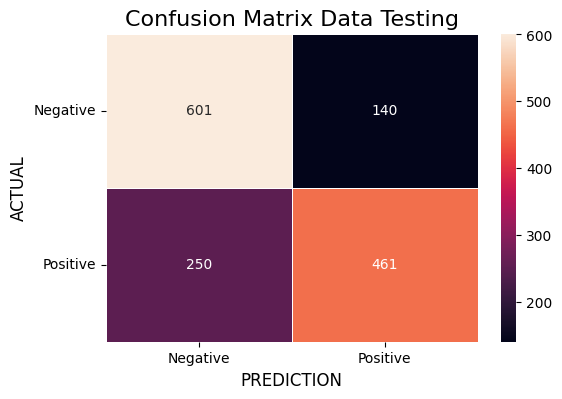

In [153]:
# Confusion matrix pada Data testing

conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix Data Testing", fontsize=16)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'], fontsize=10, rotation=360)
plt.xlabel('PREDICTION', fontsize=12)
plt.ylabel('ACTUAL', fontsize=12)
plt.show()

#### **Hyperparameter Tuning**

[GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) 

[Referensi](https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/)

In [57]:
estimator = Pipeline([
    ('preparation', transformer),
    ('modelling', gbc)
])

hyperparam_space = {
    'modelling__loss': ['log_loss', 'exponential'],
    'modelling__learning_rate': [0.1, 0.075, 0.125, 0.05],
    'modelling__n_estimators': [100, 200, 500, 700],
    'modelling__max_depth': [2,3,5],
    'modelling__min_samples_split': [2,10,20,70],
    'modelling__random_state': [2024]
}

grid_search = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('one '
                                                                         'hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['housing',
                                                                          'loan',
                                                                          'contact']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(mapping=[{'col': 'month',
                                                                                                  'data_type': dtype('O'),
                                                                                                  'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6...
                                                                          'pdays'])])),
                                       ('modelling',
                                        GradientBoostingClassifier(random_state=2024))]),
             n_jobs=-1,
             param_grid={'modelling__learning_rate': [0.1, 0.075, 0.125, 0.05],
                         'modelling__loss': ['log_loss', 'exponential'],
                         'modelling__max_depth': [2, 3, 5],
                         'modelling__min_samples_split': [2, 10, 20, 70],
                         'modelling__n_estimators': [100, 200, 500, 700],
                         'modelling__random_state': [2024]},
             scoring='f1')

In [60]:
grid_search.best_params_

{'modelling__learning_rate': 0.1,
 'modelling__loss': 'exponential',
 'modelling__max_depth': 3,
 'modelling__min_samples_split': 20,
 'modelling__n_estimators': 200,
 'modelling__random_state': 2024}

In [61]:
grid_search.best_score_

0.6918667486658456

In [151]:
model_best = grid_search.best_estimator_
model_best.fit(X_train, y_train)

y_train_pred_tuned = model_best.predict(X_train)
y_pred_tuned = model_best.predict(X_test)

print('Classification report Data Testing setelah Tuning : ')
print(classification_report(y_test, y_pred_tuned))

Classification report Data Testing setelah Tuning : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       741
           1       0.77      0.64      0.70       711

    accuracy                           0.73      1452
   macro avg       0.74      0.73      0.73      1452
weighted avg       0.74      0.73      0.73      1452



In [152]:
print(f'F1 score dari data testing sebelum Tuning : {(f1_score(y_test, y_pred))}')

print(f'F1 score dari data testing setelah Tuning : {f1_score(y_test, y_pred_tuned)}')

F1 score dari data testing sebelum Tuning : 0.7027439024390244
F1 score dari data testing setelah Tuning : 0.7013782542113323


Dari data diatas terlihat hyperparameter tuning tidak menghasilkan peningkatan f1 score. f1 score yang diperoleh hampir sama dengan tanpa tuning yaitu senilai 0.70.

#### **Feature Importances**

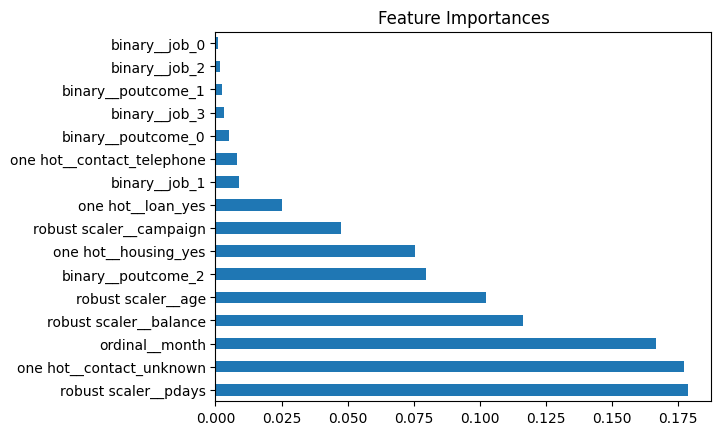

In [65]:
coef = pd.Series(model_best['modelling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False)
coef.plot(kind='barh', title='Feature Importances')
plt.show()

Dari hasil diatas diketahui 5 fitur paling penting adalah : pdays, contact, month, balance, age.

## Conclusion

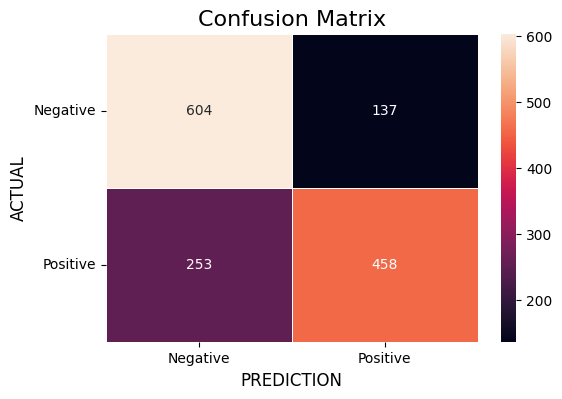

In [67]:
# Confusion matrix pada Data testing

conf_matrix = confusion_matrix(y_test, y_pred_tuned)

f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=16)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'], fontsize=10, rotation=360)
plt.xlabel('PREDICTION', fontsize=12)
plt.ylabel('ACTUAL', fontsize=12)
plt.show()

In [68]:
print('Classification report Data Testing setelah Tuning : ')
print(classification_report(y_test, y_pred_tuned))

Classification report Data Testing setelah Tuning : 
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       741
           1       0.77      0.64      0.70       711

    accuracy                           0.73      1452
   macro avg       0.74      0.73      0.73      1452
weighted avg       0.74      0.73      0.73      1452



1. Pada model benchmarking kita menggunakan f1 score sebagai metrix evaluation untuk pemilihan model. 
    Kerugian perusahaan dari False Negatif (saat nasabah tertarik Deposito Berjangka namun kita prediksi tidak tertarik) adalah perusahaan akan kehilangan potential nasabah dan nasabah tersebut akhirnya membuka Deposito Berjangka di bank lain (competitor).
    Kerugian perusahaan dari False Positif (saat nasabah tidak tertarik Deposito Berjangka namun kita prediksi tertarik) adalah perusahaan mengalami kerugian biaya marketing yang tidak tepat sasaran, menghabiskan banyak waktu untuk menghubungi calon nasabah namun tidak terkonversikan dengan pembukaan Deposito Berjangka.
    Oleh karena ini, kita memakai f1 score sebagai rataan harmonik dari recall dan presisi untuk memilih model algoritma.

2. Model GradientBoostingClassifier (GBC) memiliki nilai tertinggi dalam benchmarking. Model GBC adalah hasil modifikasi dari metode boosting pada umumnya.
 
3. Hasil prediksi model kita berhasil mendapatkan 64% nasabah yang benar-benar tertarik dari keseluruhan nasabah yang tertarik membuka Deposito Berjangka, serta berhasil menghemat biaya marketing dengan mengurangi 82% nasabah yang tidak tertarik untuk tidak perlu kita tawarkan produk Deposito Berjangka.

4. Model kita memiliki ketepatan prediksi senilai 77% yang artinya apabila model memprediksi nasabah tertarik maka kemungkinan prediksi tersebut benar adalah 77% (dari nilai presisi). 

5. Biaya marketing yang sia-sia adalah biaya yang diberikan kepada 18% nasabah yang diprediksi tertarik namun ternyata tidak tertarik (dari nilai recall kelas 0).

6. Dari hasil feature importance diketahui 5 fitur paling penting adalah : pdays, contact, month, balance, age.

7. Rata-rata nasabah yang tertarik membuka Deposito Berjangka memiliki kriteria sebagai berikut: 
    - berusia                   : rata-rata 42 tahun
    - memiliki saldo rekening   : rata-rata 1812 USD
    - dikontak sebanyak         : rata-rata 2 kali selama marketing berlangsung
    - dihubungi marketing       : rata-rata 69 hari yang lalu
    - bekerja                   : bagian Management
    - rumah                     : tidak memiliki rumah
    - loan                      : tidak memiliki pinjaman
    - contact                   : melalui celluar
    - hasil marketing sebelumnya : tidak diketahui (berarti nasabah yang belum berhasil atau gagal di masa marketing sebelumnya memiliki kemungkinan tertarik yang besar pada masa marketing sekarang ini)
    

## Estimation of Business Profits

- Dengan menggunakan logika analisa yang mirip dengan artikel berikut [cost benefit analysis](https://www.chegg.com/homework-help/questions-and-answers/need-help-part-4-banks-generate-significant-profits-term-deposits-certificate-deposit-cd---q58052818), kita asumsikan biaya marketing yang dikeluarkan company untuk setiap calon nasabah adalah $10/orang. 
- Kita memiliki 400 orang calon nasabah yang akan kita pasarkan produk Deposito Berjangka.

**Tanpa Bantuan Model**

Asumsi dari 400 orang terbagi 50:50 yaitu 200 nasabah tertarik dan 200 nasabah tidak tertarik untuk membuka Deposito Berjangka.

- Total Biaya Marketing => 400 x $10 = $4000
- Total Kandidat Tertarik yang didapatkan => 200 orang (semua nasabah dihubungi untuk penawaran Deposito)
- Total Kandidat Tertarik yang tidak dihubungi marketing => 0 orang (semua nasabah dihubungi untuk penawaran Deposito)
- Total Kandidat Tidak Tertarik dan dihubungi marketing => 200 orang.
- Biaya yang terbuang => 200 x $10 = $2000 (karena 250 orang menolak dan usaha marketing menjadi sia-sia)
- Jumlah penghematan => $0 karena company menghubungi nasabah seluruhnya untuk marketing produk Deposito.

**Dengan Bantuan Prediksi Model**

- Total Biaya Marketing (ke yang diprediksi tertarik) ---> (64% x 200 x $10) + (18% x 200 x $10) = $1640.
- Total Kandidat Tertarik yang didapatkan (True Positif) ---> 64% x 200 = 128 orang.
- Total Kandidat Tertarik yang tidak dihubungi marketing (False Negatif) ---> (100-64%) x 200 = 72 orang (company kehilangan 72 orang potential nasabah)
- Total Kandidat Tidak Tertarik dan dihubungi marketing (False Positif) ---> 18% x 200 = 36 orang.
- Biaya yang terbuang ke (False Positif) ---> 36 x $10 = $360.
- Jumlah penghematan dari (True Negatif) ---> 82% x 200 x $10 = $1640 karena company tidak perlu menghubungi nasabah yang sudah diprediksi tidak tertarik 

Sehinga dari yang awalnya memelukan biaya marketing $4000 untuk menarik 200 nasabah baru ($20/orang), dengan bantuan prediksi model menjadi hanya dengan biaya marketing $1640 untuk menarik 128 nasabah baru ($12.8/orang).
Sehingga ini akan **menekan biaya marketing sebesar 36%**.

## Model Recommendation

### Final Model

In [71]:
# Save Model

estimator_final = Pipeline([
    ('preparation', transformer),
    ('modelling', GradientBoostingClassifier(loss = 'exponential', 
                                      learning_rate = 0.1,
                                      max_depth = 3,
                                      min_samples_split = 20,
                                      n_estimators = 200,
                                      random_state = 2024))
                            ])

In [72]:
estimator_final.fit(X_train, y_train)

Pipeline(steps=[('preparation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}]),
                                                  ['month']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'poutcome']),
                                                 ('robust scaler',
                                                  RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('modelling',
                 GradientBoostingClassifier(loss='exponential',
                                            min_samples_split=20,
                                            n_estimators=200,
                                            random_state=2024))])

In [75]:
# Save Model

with open('model_gbc_bank.pkl', 'wb') as file_model:
    pickle.dump(estimator_final, file_model)

In [76]:
# Load model
with open('model_gbc_bank.pkl','rb') as file_model:
    gbc_load = pickle.load(file_model)

In [78]:
gbc_load

Pipeline(steps=[('preparation',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot',
                                                  OneHotEncoder(drop='first'),
                                                  ['housing', 'loan',
                                                   'contact']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'month',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': jan     1
feb     2
mar     3
apr     4
may     5
jun     6
jul     7
aug     8
sep     9
oct    10
nov    11
dec    12
dtype: int64}]),
                                                  ['month']),
                                                 ('binary', BinaryEncoder(),
                                                  ['job', 'poutcome']),
                                                 ('robust scaler',
                                                  RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('modelling',
                 GradientBoostingClassifier(loss='exponential',
                                            min_samples_split=20,
                                            n_estimators=200,
                                            random_state=2024))])

### Rekomendasi Model 

Model ini memiliki keterbatasan dalam penggunaannya yaitu :
1. Model ini baik untuk memprediksi nasabah dengan nilai `age` batas usia maximal 80 tahun.
2. Model ini baik untuk memprediksi nasabah dengan nilai `balance` saldo yang dimiliki yang tidak minus.
3. Untuk improvement ke depannya dapat mencoba memvariasikan hyperparameter tuning kembali yang mampu meningkatkan f1 scorenya lebih baik dari default model GBC.

## Business Recommendation

In [80]:
df['contact'].unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

<Axes: xlabel='count', ylabel='contact'>

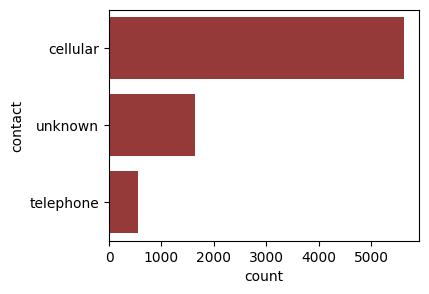

In [147]:
# Visualisasi count contact types

plt.figure(figsize=(4,3))

sns.countplot(y = df['contact'], 
                  data = df, 
                  order = df['contact'].value_counts().sort_values(ascending = False).index, 
                  color= 'brown')

Metode marketing yang dilakukan perusahaan saat ini berdasarkan dataset yang dimiliki adalah melalui telepon baik menghubungi telephone(rumah atau kantor) dan telepon genggam (cellular) dari nasabah.

Untuk ke depannya, perusahaan mungkin dapat menambahkan alat komunikasi lainnya untuk marketing seperti melalui e-mail atau komunikasi online (contoh: Whatsapp resmi perusahaan). Adanya kekhawatiran terhadap penipuan melalui telepon mungkin saja menyebabkan nasabah saat ini cenderung menolak tawaran marketing bank dari telepon. 

Digital marketing produk Deposito Berjangka dapat dikirimkan secara daring melalui email dengan menuliskan informasi-informasi penting seperti rate interest, jangka waktu minimal Deposito Berjangka tersebut, cara membuka Deposito Berjangka apabila nasabah tertarik, dan sebagainya. Biaya yang diperlukan untuk melakukan marketing dengan cara ini juga lebih murah dibandikan telepon.